## 3. 미분
### 변화량, 변화율
단위가 중요

[Quiz] 950130.csv 파일의 읽고, 다음을 계산하시오.
1. 고가에 대한 연간, 월간, 주간, 일간 주가의 변화량
2. 고가에 대한 연간, 월간, 주간, 일간 주가의 변화율
3. 변화율에 대한 평균값을 읽고, 
4. 변화율로 부터, 2019년 9월 19일 주가로부터 2020년 9월 18일의 주가를 계산하시오.

In [1]:
import numpy as np
import pandas as pd
sp = pd.read_csv("950130.csv", parse_dates=["Date"])
sp = sp.set_index("Date", drop=True)
sphigh = sp[["High"]]
sphigh.head()

,High
Date,
2020-09-18,31800
2020-09-17,32900
2020-09-16,31950
2020-09-15,30500
2020-09-14,30000


(1) 연간 변화량과 변화율

In [2]:
ydiff = sphigh.iloc[0,0] - sphigh.iloc[-1,0]
ydiffrate = ydiff/sphigh.iloc[-1,0]
ydiff, ydiffrate

(29590, 13.389140271493213)

(2) 월간 변화량과 변화율

In [3]:
didx = pd.date_range('2019-9-19', '2020-9-19')

In [4]:
tmp = sphigh.reindex(index=didx)
tmp.tail()

,High
2020-09-15,30500.0
2020-09-16,31950.0
2020-09-17,32900.0
2020-09-18,31800.0
2020-09-19,NaN


In [5]:
tmp = tmp.fillna(method='ffill')
tmp.tail()

,High
2020-09-15,30500.0
2020-09-16,31950.0
2020-09-17,32900.0
2020-09-18,31800.0
2020-09-19,31800.0


In [6]:
tmp19 = tmp[didx.day == 19]
tmp19

,High
2019-09-19,2210.0
2019-10-19,2270.0
2019-11-19,2490.0
2019-12-19,2205.0
2020-01-19,2125.0
2020-02-19,2310.0
2020-03-19,3675.0
2020-04-19,4440.0
2020-05-19,4460.0
2020-06-19,3705.0


In [7]:
mdiff = tmp19.diff()
mdiff = mdiff.dropna()
mdiff

,High
2019-10-19,60.0
2019-11-19,220.0
2019-12-19,-285.0
2020-01-19,-80.0
2020-02-19,185.0
2020-03-19,1365.0
2020-04-19,765.0
2020-05-19,20.0
2020-06-19,-755.0
2020-07-19,30.0


In [8]:
# mdiffrate = tmp19.pct_change().dropna()
mdiffrate = mdiff/tmp19.shift().dropna()
mdiffrate

,High
2019-10-19,0.027149
2019-11-19,0.096916
2019-12-19,-0.114458
2020-01-19,-0.036281
2020-02-19,0.087059
2020-03-19,0.590909
2020-04-19,0.208163
2020-05-19,0.004505
2020-06-19,-0.169283
2020-07-19,0.008097


In [9]:
tmp19.pct_change().dropna()

,High
2019-10-19,0.027149
2019-11-19,0.096916
2019-12-19,-0.114458
2020-01-19,-0.036281
2020-02-19,0.087059
2020-03-19,0.590909
2020-04-19,0.208163
2020-05-19,0.004505
2020-06-19,-0.169283
2020-07-19,0.008097


(3) 주간 변화량과 변화율

In [10]:
pass

(4) 일간 변화량과 변화율

월간과 달리, 날짜 색인에 대해 내림차순으로 정렬되어 있어, periods 값을 반대로 해야 한다.

In [11]:
ddiff = sphigh.diff(-1)
ddiff.head()

,High
Date,
2020-09-18,-1100.0
2020-09-17,950.0
2020-09-16,1450.0
2020-09-15,500.0
2020-09-14,-500.0


In [12]:
ddiff/sphigh.shift(-1)

,High
Date,
2020-09-18,-0.033435
2020-09-17,0.029734
2020-09-16,0.047541
2020-09-15,0.016667
2020-09-14,-0.016393
...,...
2019-09-25,0.033784
2019-09-24,0.009091
2019-09-23,0.006865


In [13]:
# ddiffrate = ddiff/sphigh.shift(-1)
ddiffrate = sphigh.pct_change(-1)
ddiffrate

,High
Date,
2020-09-18,-0.033435
2020-09-17,0.029734
2020-09-16,0.047541
2020-09-15,0.016667
2020-09-14,-0.016393
...,...
2019-09-25,0.033784
2019-09-24,0.009091
2019-09-23,0.006865


변화율과 변화량에 대한 수학적 이해
![](https://mblogthumb-phinf.pstatic.net/20160215_204/junhyuk7272_1455513946343KuVeI_PNG/%C6%F2%B1%D5%BA%AF%C8%AD%C0%B2.png?type=w420)

![](https://mblogthumb-phinf.pstatic.net/20160215_216/junhyuk7272_1455513987980BQbvM_PNG/%BC%F8%B0%A3%BA%AF%C8%AD%C0%B2.png?type=w2)

### 자동미분 패키지
#### scipy
scipy에서 제공하는 미분은 미분함수보다는 미분값을 제공한다.
$$\begin{align}
f^{'}(x) &= \lim_{\Delta x \rightarrow 0} \cfrac {\Delta f(x)}{\Delta x} =
\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x)}{\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
\end{align}$$

In [14]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)

4.999999999921734

In [15]:
# trivial function: f(x) = x**2 - 1 / (x - 1)
def fprimeOdd(x):
    dx = 1e-6
    df = f(x+dx) - f(x)
    return df / dx
# useful function
def fprimeEven(x):
    dx = 1e-12
    df = f(x+dx) - f(x-dx)
    return df / (2*dx)

In [16]:
fprimeEven(1)

5.00022245830678

#### sympy
미분함수를 생성해준다.

In [17]:
import sympy as sym

x = sym.Symbol('x')
a = sym.diff((sym.cos(x)**2),x)

a

-2*sin(x)*cos(x)

In [18]:
from math import sin, cos
def fp(x):
    return eval(str(a))
# def fp(x):
#     return -2*sin(x)*cos(x)

In [19]:
fp(3.14/4)

-0.9999996829318347

[Quiz] 다음 함수를 구현하고, 그 함수의 도함수를 구하자.
$$N(x) = \cfrac 1 {\sqrt{2 \pi }} \exp \left[ - \cfrac {(x - 1)^2}{2} \right]$$
1. 도함수를 직접 작성하고 xs = [2, 1, 0]에서 그 값을 각각 구하여라
2. 도함수의 symbol로 부터 함수를 작성하고 xs = [2, 1, 0]에서 그 값을 구하여라.

In [20]:
from math import exp, pi, sqrt
xs = [2, 1, 0]
def N(x):
    res = exp(- (x-1)**2 / 2)
    res = 1 / sqrt(2*pi) * res
    return res

In [21]:
N(3)

0.05399096651318806

In [22]:
def fprime(f, v):
    dx = 1e-12
    df = f(x+dx) - f(x-dx)
    return df / (2*dx)

In [23]:
for x in xs:
    print(fprime(N, x))

-0.2420008637926685
0.0
0.24198698600486068


sympy의 symbol로 작성하기

In [24]:
import sympy as sym

x = sym.Symbol('x')
N = 1 / sym.sqrt(2*sym.pi) * sym.exp(- (x-1)**2 / 2)

Nprime = sym.diff(N, x)
Nprime

sqrt(2)*(1 - x)*exp(-(x - 1)**2/2)/(2*sqrt(pi))

In [25]:
str(Nprime)

'sqrt(2)*(1 - x)*exp(-(x - 1)**2/2)/(2*sqrt(pi))'

eval은 문자열을 파이썬 명령으로 변경해준다.
```python
'sqrt(2)*(1 - x)*exp(-(x - 1)**2/2)/(2*sqrt(pi))'
sqrt(2)*(1 - x)*exp(-(x - 1)**2/2)/(2*sqrt(pi))
```

In [26]:
# from numpy import sqrt, pi, exp
from math import sqrt, pi, exp
def fp(x):
    return eval(str(Nprime))

In [27]:
for x in xs:
    print(fp(x))

-0.2419707245191434
0.0
0.2419707245191434


[Quiz] 다음 함수를 구현하고, 그 함수의 도함수를 구하자.
$$softmax(x) = \cfrac {e^{x}}{\sum_i e^x_i}$$
1. 도함수를 직접 작성하고 x = [2, 4, 0]에서 그 값을 구하여라
2. 도함수의 symbol로 부터 함수를 작성하고 x = [2, 4, 0]에서 그 값을 구하여라.

> [Notice] 벡터에 대한 벡터의 미분은 행렬을 생성한다.

In [28]:
def softmax(v):
    expv = np.exp(v)
    return expv / expv.sum()

In [29]:
def sprime(x):
    dx = 1e-12
    pmatrix = np.empty((len(x), len(x)))
    arr = np.empty_like(x)
    for i in range(len(arr)):
        arr = x.copy()
        arr[i] = arr[i] + dx
        pmatrix[i] = (softmax(arr) - softmax(x)) / dx
    return pmatrix

In [30]:
# 미분할 때, 조심할 사항은 항상 dtype이 float를 갖도록 해줘야 한다.
v = np.array([2., 4., -1.])
dx = 1e-12
print(softmax(v), softmax(v).sum())
sprime(v)

[0.11849965 0.8756006  0.00589975] 1.0


array([[ 0.10447199, -0.10369483, -0.00069909],
       [-0.10376422,  0.10891288, -0.00516687],
       [-0.00069389, -0.00521805,  0.00586423]])

아래는 검산하기 위한 코드이다.

In [31]:
vh = np.array([2, 4, -1+dx])
(softmax(vh) - softmax(v))/dx

array([-0.00069389, -0.00521805,  0.00586423])

## 수학적으로 미분을 계산
$$\begin{align}
f^{'}(x) &= \lim_{\Delta x \rightarrow 0} \cfrac {\Delta f(x)}{\Delta x} =
\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x)}{\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
\end{align}$$

<AxesSubplot:xlabel='x'>

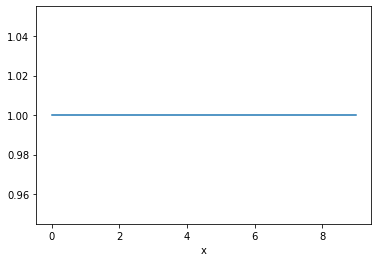

In [32]:
import numpy as np
x = np.arange(10, dtype='float')
y = np.ones_like(x)

import pandas as pd
y = pd.Series(y)
y.index = x
y.index.name = 'x'
y.plot()

$y = f(x) = 1 = x^0$
위 함수에 대해 미분을 구하면:
$$\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x)} {\Delta x} = 0$$

$y = f(x) = x^n$ 에 대한 미분을 구하면:
$$\begin{align}
\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x)} {\Delta x} &= \cfrac {(x + \Delta x)^n - x^n} {\Delta x} \\
&= \cfrac {x^n + n x^{n-1} \Delta x + nC_2 x^{n-2} \Delta x^2 ... - x^n} {\Delta x}\\
&= n x^{n-1}
\end{align}$$

$y = f(x) + g(x)$ 에 대한 미분을 구하면:
$$\begin{align}
y^{'}(x) &=
\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) + g(x + \Delta x) - g(x) - f(x)}{\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) - f(x)}{\Delta x} + \cfrac {g(x + \Delta x) - g(x)} {\Delta x}\\
& = f^{'}(x) + g^{'}(x)
\end{align}$$

일반적으로 $y =  af(x) + bg(x) + ch(x) + ... $ 에 대한 미분이 아래와 같이 정리됨을 쉽게 보일 수 있다.
$$y^{'}(x) = af^{'}(x) + bg^{'}(x) + ch^{'}(x) + \cdots $$

$y = 3x^3 - 5 x^2 + x + 4$ 미분을 구하게 되면:
- $y^{'} = 9 x^2 - 10 x + 1$

음수 지수 승(n = -m) 에 대해도 같은 법칙이 성립하는 지 알아봅시다.

$y = f(x) = x^{-m}$ 인 경우에도 동일하게 $y^{'} = -m x^{-m-1}$ 이 성립할까?
- set: $z = x^{-1} = \cfrac 1 x$


---
$y = f(x)g(x)$ 인 경우:
$$\begin{align}
y^{'}(x) &=
\lim_{\Delta x \rightarrow 0} \cfrac {f(x + \Delta x) g(x + \Delta x) - g(x) f(x)}{\Delta x} \\
&=
\lim_{\Delta x \rightarrow 0} \cfrac {\left[ f(x + \Delta x) g(x + \Delta x) - f(x + \Delta x) g(x) \right] + \left[ f(x + \Delta x) g(x) - g(x) f(x) \right]}{\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} f(x + \Delta x) g^{'}(x) + f^{'}(x) g(x)\\
& = f^{'}(x) g(x) + f(x) g^{'}(x)
\end{align}$$

[Quiz] $ y = f(z) = f(g(x))$, @$z = g(x)$ 인 경우, $y^{'}(x) = ?$

#### 미분의 연쇄법칙
$$\begin{align}
y^{'}(x) &= \cfrac {\Delta y}{\Delta x} = 
\lim_{\Delta x \rightarrow 0} \cfrac {f(g(x + \Delta x)) - f(g(x))} {\Delta x} \text{;     We set: }f(g(x + \Delta x)) = f(z + \Delta z)\\
&=
\lim_{\Delta x, \Delta z \rightarrow 0} \cfrac {f(z + \Delta z) - f(z)} {\Delta x} = \lim_{\Delta x, \Delta z \rightarrow 0} \cfrac {f(z + \Delta z) - f(z)} {\Delta x} \cfrac {\Delta z}{\Delta z}\\
& = f^{'}(z)g^{'}(x)  \text{;     Generally: }\\
\cfrac {\Delta y}{\Delta x} &= \cfrac {\Delta y}{\Delta z} \cfrac {\Delta z}{\Delta x}
\end{align}$$

$y = f(x) = x^{-m}$ 인 경우에도 동일하게 $y^{'} = -m x^{-m-1}$ 이 성립할까?
- set: $z = x^{-1} = \cfrac 1 x$

1. 먼저 아래 식을 살펴보면:
$$\begin{align}
z'(x) = \left( \cfrac 1 x \right)^{'} &= \lim_{\Delta x \rightarrow 0} \cfrac {\cfrac 1 {x + \Delta x} - \cfrac 1 x} {\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} \cfrac {\cfrac x {x(x + \Delta x)} - \cfrac {x + \Delta x} {x(x + \Delta x)}} {\Delta x} \\
&= \lim_{\Delta x \rightarrow 0} \cfrac {\cfrac {-\Delta x} {x(x + \Delta x)}} {\Delta x} = - \cfrac 1 {x^2}
\end{align}$$
2. 이제 $y = x^{-m} = f(g(x)) = f(z) = z^m$, $z = g(x) = \cfrac 1 x$라 하면, 위의 결과를 이용하여:
$$\begin{align}
y'(x) &= f(g(x)) = f^{'}(z)g^{'}(x) \\
&= m z^{m-1} \left( - \cfrac 1 {x^2} \right) = - m \left( \cfrac 1 {x^{m-1}} \right) \left( \cfrac 1 {x^2} \right)\\
&= - m \cfrac 1 {x^{m+1}} = n x^{n-1} \text(; n = -m)
\end{align}$$

일반적으로, for $n \in R$, $y(x) = x^n$인 경우, $y^{'} = n x^{n-1}$이 항상 성립한다.
- $R$은 실수의 집합을 의미한다.

\begin{align}
y(x) &= \cfrac {f(x)} {g(x)} = f(x) G(x), \text{  hear: }G(x) = g^{-1}(x)\\
y^{'}(x) &= \cfrac {f^{'}(x) g(x) - g^{'}(x) f(x)} {g^2(x)}
\end{align}

#### e의 이해
마법의 저금통은 1원을 넣으면 정확히 1년 뒤에 1원이 더 늘어나(즉, 100% 성장률) 2원이 된다
![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-09-04_natural_number_e/pic1.png)

여기서 만약 6개월마다 50%씩 성장한다고 세팅을 변경하면 어떻게 될까?
![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-09-04_natural_number_e/pic2.png)
- $1\times(1+0.5) + 0.5\times(1+0.5) = (1 + \cfrac 1 2)^2$

그러면, 3번에 나눠서 성장시킨다면 어떻게 될지 확인해보자.
![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-09-04_natural_number_e/pic3.png)
- $1\times(1+ \cfrac 1 3) + \cfrac 1 3 \times(1+\cfrac 1 3) + \cfrac 1 3 \times (1+\cfrac 1 3) + \cfrac 1 3 \times \cfrac 1 3 \times(1+\cfrac 1 3) = (1 + 2\cfrac 1 3 + (\cfrac 1 3)^2)(1 + \cfrac 1 3) = (1 + \cfrac 1 3)^2$

일반화하여 n번 나눠 성징시키면
$$(1+\frac{1}{n})^n$$

무한히 많이 쪼개면 어떻게 될까? 성장량도 무한하게 커질까?


$$\begin{align}
e &= \lim_{n \to \infty} \left(1 + \cfrac 1 n \right)^n = \sum _{{n=0}}^{\infty }{\frac  {1}{n!}} \sim 2.718\\
e^{x}&=\sum _{n=0}^{\infty }{{x^{n}} \over {n!}}
\end{align}$$

#### 지수승에 대한 미분
[Quiz] $y = e^x$일 때, $y^{'}$을 구하여라.

$$\begin{align}
y^{'}(x) &= \lim_{\Delta x \to 0} \cfrac {e^{x + \Delta x} - e^x}{\Delta x} = e^x \cfrac {e^{\Delta x} - 1}{\Delta x}\\
&= e^x \lim_{\Delta x \to 0} \lim_{n \to \infty} \cfrac {\sum _{n=0}^{\infty }{{\Delta x^{n}} \over {n!}} -1 } {\Delta x}\\
&= e^x \lim_{\Delta x \to 0}  \cfrac {( 1 + \cfrac {\Delta x}{1} + \cfrac {\Delta x^2}{2} + \cdots ) - 1} {\Delta x}  \\
&= e^x \left[ 1 + (\cfrac {\Delta x}{2} + \cfrac {\Delta x^2}{3!} + \cdots) \right] \\
&= e^x
\end{align}$$

log 함수에 대해:

$y = \log(x)$는 지수함수의 역함수로서 $e^y = x$
- $e^{\log(x)} = x$의 관계를 갖는다.

[Quiz] $z = e^{ax}$이고, $y = b^x$ 이라고 할 때, $z^{'}(x)$, $y^{'}(x)$를 구하자. 단, a, b는 모두 상수.

1. 이제 $y = b^x$에 대한 미분을 구해보자.
 - $b = e^a$이라 하면, $y = e^{ax}$이 되어
 - $y^{'}(x) = a b^x$이 된다.
 - 이제 a가 b에 대한 어떤 값을 가지는 지 알아내면 된다.
$$\begin{align}
b &= e^a &\text{ ; 양변에 log 함수를 취하면:} \\
\log(b) &= a &\text{ ; 따라서:} \\
y^{'}(x) &= \log(b) b^x
\end{align}$$

2. 먼저 z에 대한 미분(도함수)를 구해보자.
 - $z = e^{ax} = (e^a)^x$이므로, $b = e^a$이라 하면, $z(x) = b^x$이 된다.
 - 위의 1식으로 환원되므로:
$$\begin{align}
z^{'}(x) &= (b^x)^{'} = \log(b) b^x \\
&= e^{\log(a)} b^{x} = a e^{ax}
\end{align}$$

[Quiz] $y = \log(x^2)$에 대한 미분을 구해보자.

1. $z = x^2$이라 하면, $y = \log(z)$이다. $y^{'}(z)$을 먼저 구하면:
$$\begin{align}
y &= \log(z) &\text{ ; 양변에 exp을 취하면:} \\
e^y &= z &\text{ ; z를 y에 대해 미분하면:} \\
e^y &= \cfrac {\Delta z} {\Delta y} &\text{ ; 양변에 역수를 취해주면:} \\
y'(z) &= \cfrac {\Delta y} {\Delta z} = (e^y)^{-1} = (e^{\log(z)})^{-1} = z^{-1} = \cfrac 1 z
\end{align}$$
2. 이제 1식을 이용하여 최종적으로 $y^{'}(x)$를 구하면:
$$\begin{align}
y &= \log(x^2) = \log(z) \\
y^{'}(x) &= y^{'}(z) z^{'}(x) &\text{ ; }z^{'} = 2x \text{ 이므로:} \\
&= \cfrac {2x} {x^2} = \cfrac 2 x
\end{align}$$

#### i의 이해
1. 허수 i는 제곱하여 -1이 되는 값을 의미한다.
$$i^2 = -1$$
2. 허수에 대한 실수곱은 허수이다.
$$(4i)^2 = -16$$
3. 실수와 허수를 더 한 것을 복소수라 한다.
$$3 + 4i$$
4. 더해도 곱해도 실수가 되는 복소수를 켤레복소수(conjugate complex)라 한다.
 - 어떤 복소수 $(a + bi)$에 대한 켤레복소수는 $(a - bi)$이다.
 - $(a + bi) + (a - bi) = 2a$, $(a + bi) * (a - bi) = a^2 + b^2$

In [33]:
a = 3 + 4j
a

(3+4j)

In [34]:
type(a)

complex

In [35]:
a.real

3.0

In [36]:
a.imag

4.0

In [37]:
a.conjugate()

(3-4j)

In [38]:
abs(a)

5.0

In [39]:
import cmath
cmath.phase(a)

0.9272952180016122

In [52]:
cmath.phase(a)*360/(2*cmath.pi)

53.13010235415598

In [53]:
import math
cmath.pi

3.141592653589793

pi에 대한 정의 : 지름이 1인 원의 둘레

In [54]:
a = np.array([a])
a

array([[3.+4.j]])

In [43]:
a.conj()

array([3.-4.j])

In [44]:
a.conjugate()

array([3.-4.j])

In [45]:
type(a)

numpy.ndarray

```python
(3 + 4i) * (3 + 4i) = 9 - 16 + 24i = -7 + 24i
```

In [55]:
a * a

array([[-7.+24.j]])

### 삼각함수
![](http://tcpschool.com/lectures/img_codingmath_23.png)

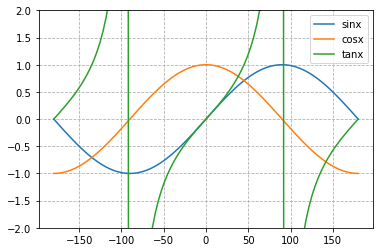

In [60]:
x = np.linspace(-pi, pi, 100)
idx = 360*x / (2*pi)
sinx, cosx, tanx = np.sin(x), np.cos(x), np.tan(x)
trif = pd.DataFrame({'sinx':sinx, 'cosx':cosx, 'tanx':tanx}, index=idx)
ax = trif.plot()
ax.set_ylim((-2, 2))
ax.grid(linestyle='--')

![](https://t1.daumcdn.net/cfile/tistory/2131C04A527E704F1F)

$$\sin \theta = \cfrac y r \text{ ... } \cos \theta = \cfrac x r \text{ ... } 
\tan \theta = \cfrac y x = \cfrac {\sin \theta}{\cos \theta}$$
$$\sin^2 \theta + \cos^2 \theta = 1$$

#### 삼각함수와 복소함수
삼각함수는 아래와 같은 오일러 공식에 의해 복소수의 지수 표현식으로 나타낼 수 있다.
$$e^{{ix}}\,=\,\cos x+i\sin x$$

##### 증명: 테일러 급수를 이용한 방법
테일러 급수에 따라 실수 범위에서 다음의 식이 성립한다.

$$
{\displaystyle e^{x}={{x^{0}} \over {0!}}+{{x^{1}} \over {1!}}+{\frac {x^{2}}{2!}}+{\frac {x^{3}}{3!}}+\cdots =\sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}}$$
따라서:

$$
{\displaystyle {\begin{array}{rll}e^{x}&{}=1+x+{\frac {x^{2}}{2!}}+{\frac {x^{3}}{3!}}+\cdots &{}=\sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}\\\cos x&{}=1-{\frac {x^{2}}{2!}}+{\frac {x^{4}}{4!}}-{\frac {x^{6}}{6!}}+\cdots &{}=\sum _{n=0}^{\infty }{\frac {(-1)^{n}}{(2n)!}}x^{2n}\\\sin x&{}=x-{\frac {x^{3}}{3!}}+{\frac {x^{5}}{5!}}-{\frac {x^{7}}{7!}}+\cdots &{}=\sum _{n=0}^{\infty }{\frac {(-1)^{n}}{(2n+1)!}}x^{2n+1}\\\end{array}}}$$

이때 ${\displaystyle x}$가 복소수일 때에 앞의 무한급수를 각각의 함수로 정의한다. 그러면:

$$
{\displaystyle {\begin{aligned}e^{iz}&{}=1+iz+{\frac {(iz)^{2}}{2!}}+{\frac {(iz)^{3}}{3!}}+{\frac {(iz)^{4}}{4!}}+{\frac {(iz)^{5}}{5!}}+{\frac {(iz)^{6}}{6!}}+{\frac {(iz)^{7}}{7!}}+{\frac {(iz)^{8}}{8!}}+\cdots \\&{}=1+iz-{\frac {z^{2}}{2!}}-{\frac {iz^{3}}{3!}}+{\frac {z^{4}}{4!}}+{\frac {iz^{5}}{5!}}-{\frac {z^{6}}{6!}}-{\frac {iz^{7}}{7!}}+{\frac {z^{8}}{8!}}+\cdots \\&{}=\left(1-{\frac {z^{2}}{2!}}+{\frac {z^{4}}{4!}}-{\frac {z^{6}}{6!}}+{\frac {z^{8}}{8!}}-\cdots \right)+i\left(z-{\frac {z^{3}}{3!}}+{\frac {z^{5}}{5!}}-{\frac {z^{7}}{7!}}+\cdots \right)\\&{}=\cos z+i\sin z\end{aligned}}}$$

가 된다.

[Quiz] $\cos(x)$, $\sin(x)$, $\tan(x)$에 대한 미분을 구하자.

$$\begin{align}
e^{ix} &= \cos x + i \sin x \\
{e^{ix}}^{'} &= \cos^{'} x + i \sin^{'} x \\
&= i e^{ix} = - \sin x + i \cos x \\
\sin^{'} x &= \cos x \\
\cos^{'} x &= - \sin x \\
\tan^{'} x &= \left[ {\cfrac {\sin x}{\cos x}} \right]^{'} \\
&= {\cfrac {\cos x \cos x + \sin x \sin x}{\cos^2 x}}\\
&= \cfrac {1}{\cos^2 x} = \sec^2 x = (1 + \tan^2 x)
\end{align}$$

[Quiz] 다음을 계산해보자.
- $\sin 2x$, $\cos 2x$, $\tan 2x$를 $\sin x$, $\cos x$, $\tan x$로 표현해보자.
- $\sin (x+y)$, $\cos (x+y)$, $\tan (x+y)$를 $\sin x$, $\cos x$, $\tan x$와 $\sin y$, $\cos y$, $\tan y$로 표현해보자.

먼저 간단한 것부터:
$$\begin{align}
e^{ix} &= \cos x + i \sin x \\
e^{i2x} &= \cos 2x + i \sin 2x \\
&= {e^{ix}}^2 \\
&= (\cos x + i \sin x)^2 \\
&= \cos^2 x - \sin^2 x + 2 i \sin x \cos x \\
\cos 2x &= \cos^2 x - \sin^2 x = 1 - \sin^2 x\\
\sin 2x &= 2 \sin x \cos x
\end{align}$$

일반화하면:
$$\begin{align}
e^{ix} &= \cos x + i \sin x \\
e^{i(x+y)} &= \cos (x+y) + i \sin (x+y) \\
&= e^{ix} \times e^{iy} \\
&= (\cos x + i \sin x) \times (\cos y + i \sin y) \\
&= (\cos x \cos y - \sin x \sin y) +  i (\sin x \cos y + \sin y \cos x) \\
\sin (x+y) &= (\cos x \cos y - \sin x \sin y) \\
\cos (x+y) &= (\sin x \cos y + \sin y \cos x)
\end{align}$$

[Quiz] 다음을 증명해보자.
- $\cos(-x) = \cos(x)$
- $\sin(-x) = - \sin(x)$
- $\tan(-x) = - \tan(x)$


$$\begin{align}
e^{ix} &= \cos x + i \sin x \\
e^{-ix} &= \cos -x + i \sin -x \\
e^{ix} \times e^{-ix} &= e^{i(x-x)} = 1 \\
\cos (x-x) &= (\cos x \cos -x - \sin x \sin -x) = 1 \\
\sin (x-x) &= (\sin x \cos -x + \sin -x \cos x) = 0 \\
\sin -x &= - \cfrac {\sin x \cos -x}{\cos x} \\
\cos (-x) &= \cos (x) \\
\sin (-x) &= - \sin (x) \\
\cos (x) &= \cfrac {e^{ix} + e^{-ix}} 2 \\
\sin (x) &= \cfrac {e^{ix} - e^{-ix}} {2i}
\end{align}$$

### 쌍곡선 함수(hyperbolic function)
삼각함수(원함수)의 사인, 코사인, 탄젠트 등에서 추론되어 각각에 대응되는 다음과 같은 함수가 있다.

쌍곡사인(hyperbolic sine)

${\displaystyle \sinh x={\frac {e^{x}-e^{-x}}{2}}=-i\sin ix = \cfrac {\sin ix}{i}\!}$

쌍곡코사인(hyperbolic cosine)

${\displaystyle \cosh x={\frac {e^{x}+e^{-x}}{2}}=\cos ix\!}$

쌍곡탄젠트(hyperbolic tangent)

${\displaystyle \tanh x={\frac {\sinh x}{\cosh x}}={\frac {\frac {e^{x}-e^{-x}}{2}}{\frac {e^{x}+e^{-x}}{2}}}={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}={\frac {e^{2x}-1}{e^{2x}+1}}=-i\tan ix\!}$

쌍곡코시컨트(hyperbolic cosecant)

${\displaystyle \operatorname {csch} x={\frac {1}{\sinh x}}={\frac {2}{e^{x}-e^{-x}}}=i\,\csc \,ix\!}$

쌍곡시컨트(hyperbolic secant)

${\displaystyle \operatorname {sech} x={\frac {1}{\cosh x}}={\frac {2}{e^{x}+e^{-x}}}=\sec {ix}\!}$

쌍곡코탄젠트(hyperbolic cotangent)

${\displaystyle \coth x={\frac {\cosh x}{\sinh x}}={\frac {\frac {e^{x}+e^{-x}}{2}}{\frac {e^{x}-e^{-x}}{2}}}={\frac {e^{x}+e^{-x}}{e^{x}-e^{-x}}}={\frac {e^{2x}+1}{e^{2x}-1}}=i\cot ix\!}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Sinh_cosh_tanh.svg/800px-Sinh_cosh_tanh.svg.png)

[Quiz] 다음과 같은 함수의 미분을 구해보자.
- $\tanh (x)$
- $\sigma(x) = \cfrac 1 {1 + \exp(-x)}$

$$\begin{align}
\tan^{'} x &= (1 + \tan^2 x) \\
\tanh x &=-i \tan ix \\
\tanh^{'} x &=-i\tan^{'} ix \\
&= (1 + \tan^2 ix) \\
&= (1 - \tanh^2 x)
\end{align}$$

$$\begin{align}
\sigma(x) &= \cfrac 1 {1 + \exp(-x)} \\
\sigma^{'}(x) &= {{1 + \exp(-x)}^{-1}}^{'} \\
&= - \cfrac {{\exp(-x)}^{'}} {{(1 + \exp(-x))}^2} \\
&= \cfrac {1 + \exp(-x) - 1} {{(1 + \exp(-x))}^2} \\
&= \sigma(x)(1 - \sigma(x)) = \sigma(x) - \sigma^2(x)
\end{align}$$

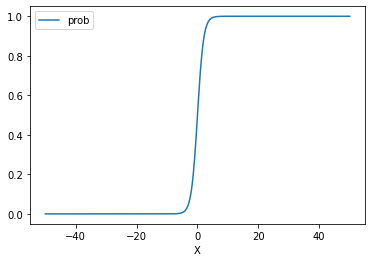

In [5]:
import numpy as np
X = np.linspace(-50, 50, 1000)

def sigmoid(v):
    return 1/(1+np.exp(-v))

prob = sigmoid(X)

import pandas as pd
sig = pd.DataFrame({'X':X, 'prob':prob})
ax = sig.plot('X', 'prob', kind='line')
# ax.set_xlim(-2, 2)

### 벡터의 미분
Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume for 1 observative : x = (1, x), w = (b, w)

We know:  (here, v and X is constant about w)

$$\begin{align}
\cfrac {\partial}{\partial w} \left( v^T \cdot w \right) &= v \\
\cfrac {\partial}{\partial w} \left( w^T \cdot v \right) &= v \\
(w^T \cdot X)^T &= X^T \cdot w \\
\cfrac {\partial}{\partial w} \left( w^T \cdot X \cdot w \right) &= X \cdot w + X^T \cdot w
\end{align}$$

So, We solve: y.shape = (N, ), X.shape=(N, p+1), w.shape = (p+1, )

\begin{align}
v &= (v1, v2, v3)\\
w &= (w1, w2, w3) \\
s =v^T \cdot w &= (v1w1 + v2w2 + v3w3) = w^T \cdot v\\
\cfrac {\Delta s}{\Delta w} &= (\cfrac {\Delta s}{\Delta w1}, \cfrac {\Delta s}{\Delta w2}, \cfrac {\Delta s}{\Delta w3})\\
&= (v1, v2, v3)
\end{align}

In [1]:
import numpy as np
X = np.arange(9).reshape((3,3))
w = np.arange(1,4)
X.shape, w.shape

((3, 3), (3,))

In [2]:
w.T.dot(X).T

array([24, 30, 36])

In [3]:
X.T.dot(w)

array([24, 30, 36])

대칭행렬 A에 대해 $A^T == A$이므로, $A^T \cdot w = A \cdot w$가 성립한다.

In [4]:
A = X.T.dot(X)
A

array([[45, 54, 63],
       [54, 66, 78],
       [63, 78, 93]])

In [8]:
A.T == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [6]:
A.dot(w)

array([342, 420, 498])

In [7]:
A.T.dot(w)

array([342, 420, 498])